# OLS Regression with Interaction Effects and ANOVA

In [18]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype


In [32]:
bla = pd.read_csv("../data/raw/train.csv")
cf = bla.copy()
cf.info()
object_cols = cf.select_dtypes(include='object').columns
print(object_cols)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
#setting correct dtype
object_cols = cf.select_dtypes(include='object').columns
cf[object_cols] = cf[object_cols].astype('category')
cf['MSSubClass'] = cf['MSSubClass'].astype('category')
cf['LotShape'] = cf['LotShape'].astype(CategoricalDtype(categories=['IR3', 'IR2', 'IR1', 'Reg'], ordered= True))
cf['LandSlope'] = cf['LandSlope'].astype(CategoricalDtype(categories=['Sev', 'Mod', 'Gtl'], ordered= True))
cf['OverallQual'] = cf['OverallQual'].astype(CategoricalDtype(categories=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], ordered= True))
cf['OverallCond'] = cf['OverallCond'].astype(CategoricalDtype(categories=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], ordered= True))



cf.info()
cf['OverallQual'].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1460 non-null   int64   
 1   MSSubClass     1460 non-null   category
 2   MSZoning       1460 non-null   category
 3   LotFrontage    1201 non-null   float64 
 4   LotArea        1460 non-null   int64   
 5   Street         1460 non-null   category
 6   Alley          91 non-null     category
 7   LotShape       1460 non-null   category
 8   LandContour    1460 non-null   category
 9   Utilities      1460 non-null   category
 10  LotConfig      1460 non-null   category
 11  LandSlope      1460 non-null   category
 12  Neighborhood   1460 non-null   category
 13  Condition1     1460 non-null   category
 14  Condition2     1460 non-null   category
 15  BldgType       1460 non-null   category
 16  HouseStyle     1460 non-null   category
 17  OverallQual    1460 non-null   ca

0    7
1    6
2    7
3    7
4    8
Name: OverallQual, dtype: category
Categories (10, int64): [1 < 2 < 3 < 4 ... 7 < 8 < 9 < 10]

In [3]:
# Load cleaned data
df = pd.read_csv("../data/clean_reclean/ordinal_numerized_cleaned.csv")

# Drop ID column if present
if 'Id' in df.columns:
    df = df.drop(columns=['Id'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LotShape_code      1460 non-null   int64  
 1   LandSlope_code     1460 non-null   int64  
 2   ExterQual_code     1460 non-null   int64  
 3   ExterCond_code     1460 non-null   int64  
 4   BsmtQual_code      1460 non-null   float64
 5   BsmtCond_code      1460 non-null   float64
 6   BsmtExposure_code  1460 non-null   float64
 7   BsmtFinType1_code  1460 non-null   float64
 8   BsmtFinType2_code  1460 non-null   float64
 9   HeatingQC_code     1460 non-null   int64  
 10  KitchenQual_code   1460 non-null   int64  
 11  Functional_code    1460 non-null   int64  
 12  FireplaceQu_code   1460 non-null   float64
 13  GarageFinish_code  1460 non-null   float64
 14  GarageQual_code    1460 non-null   float64
 15  GarageCond_code    1460 non-null   float64
 16  PavedDrive_code    1460 

### Commentaire à faire sur le choix des variables

In [3]:
# Define top 6 binary/ordinal features (from previous selection)
# Euh elle est où la sélection ?
# C'est parce que ces variables vont de 1 à 5 ?
features = [
    'ExterQual_code',
    'KitchenQual_code',
    'BsmtQual_code',
    'GarageFinish_code',
    'HeatingQC_code',
    'BsmtExposure_code'
]

# Drop rows with missing SalePrice or selected features (should already be clean, but just in case)
df = df.dropna(subset=features + ['SalePrice'])


In [4]:
# Build formula with main effects + 2-way interactions
main_effects = ' + '.join(features)
interactions = ' + '.join([f"{a}:{b}" for a, b in itertools.combinations(features, 2)])
formula = f"SalePrice ~ {main_effects} + {interactions}"

print(f"Model formula:\n{formula}\n")

# Fit the OLS model
model = ols(formula, data=df).fit()


Model formula:
SalePrice ~ ExterQual_code + KitchenQual_code + BsmtQual_code + GarageFinish_code + HeatingQC_code + BsmtExposure_code + ExterQual_code:KitchenQual_code + ExterQual_code:BsmtQual_code + ExterQual_code:GarageFinish_code + ExterQual_code:HeatingQC_code + ExterQual_code:BsmtExposure_code + KitchenQual_code:BsmtQual_code + KitchenQual_code:GarageFinish_code + KitchenQual_code:HeatingQC_code + KitchenQual_code:BsmtExposure_code + BsmtQual_code:GarageFinish_code + BsmtQual_code:HeatingQC_code + BsmtQual_code:BsmtExposure_code + GarageFinish_code:HeatingQC_code + GarageFinish_code:BsmtExposure_code + HeatingQC_code:BsmtExposure_code



In [5]:
# Perform ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)
print("ANOVA Table:\n")
print(anova_table)


ANOVA Table:

                                           sum_sq      df          F  \
ExterQual_code                       1.179770e+11     1.0  52.084007   
KitchenQual_code                     2.256834e+11     1.0  99.633757   
BsmtQual_code                        1.451430e+11     1.0  64.077142   
GarageFinish_code                    1.540634e+11     1.0  68.015277   
HeatingQC_code                       1.865957e+09     1.0   0.823775   
BsmtExposure_code                    1.148068e+11     1.0  50.684448   
ExterQual_code:KitchenQual_code      3.637203e+10     1.0  16.057375   
ExterQual_code:BsmtQual_code         3.503570e+08     1.0   0.154674   
ExterQual_code:GarageFinish_code     7.065845e+08     1.0   0.311940   
ExterQual_code:HeatingQC_code        9.975241e+09     1.0   4.403828   
ExterQual_code:BsmtExposure_code     2.515135e+09     1.0   1.110371   
KitchenQual_code:BsmtQual_code       1.167409e+10     1.0   5.153827   
KitchenQual_code:GarageFinish_code   3.787149e+08 

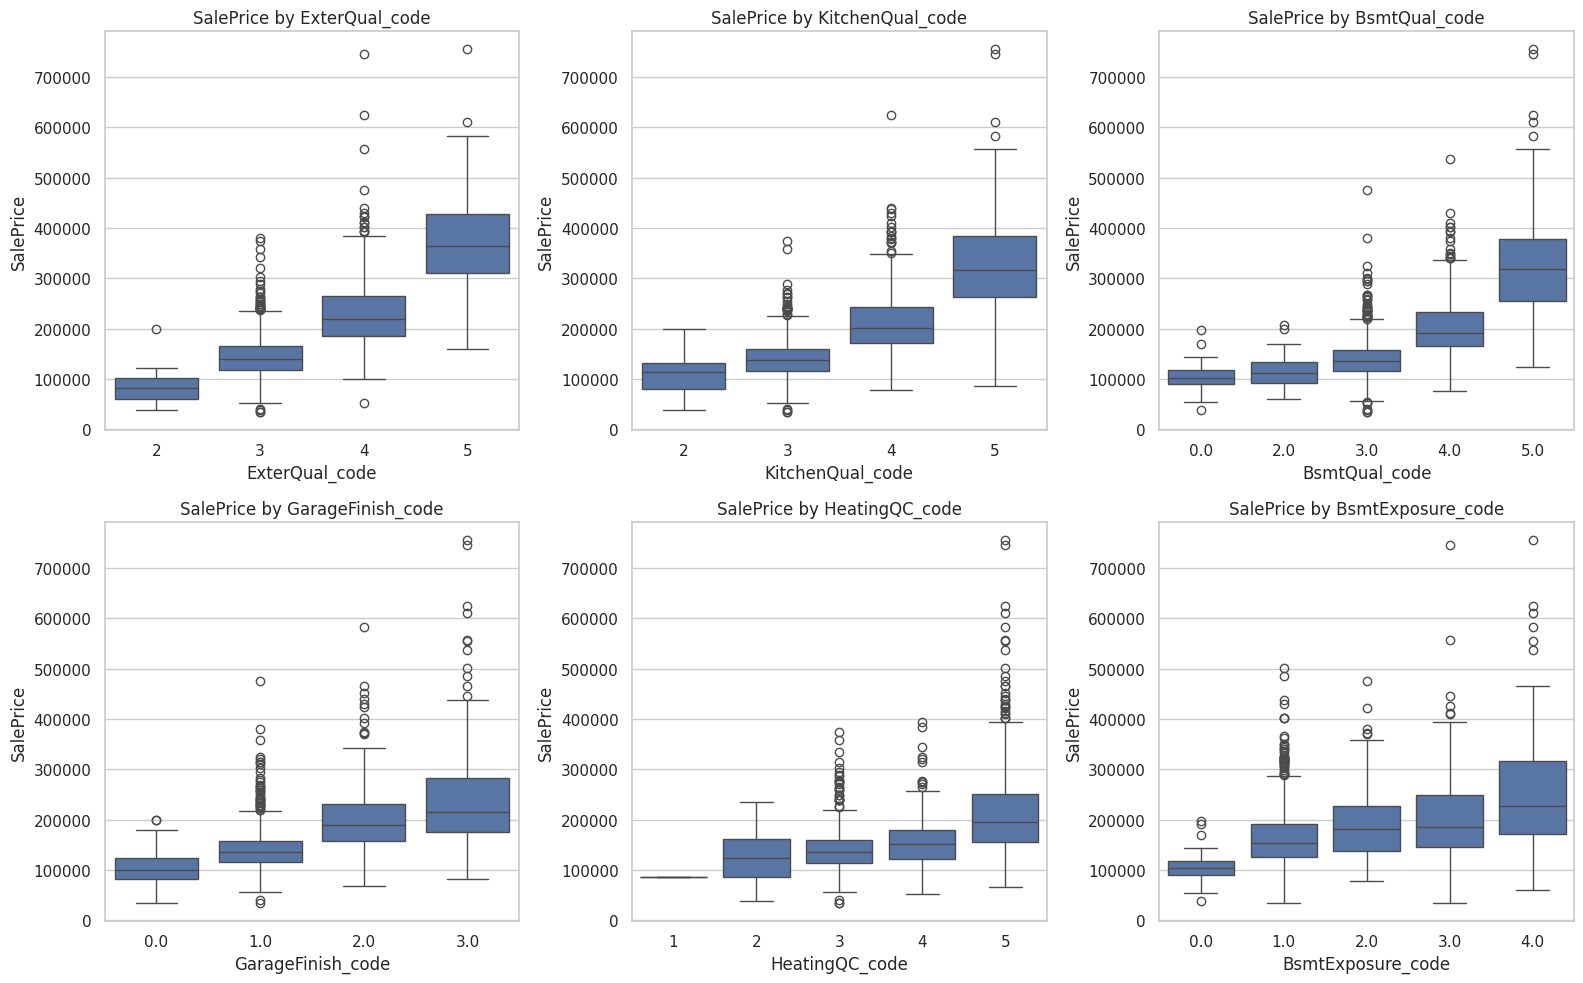

In [6]:
# Plot main effects
sns.set(style="whitegrid")
fig, axs = plt.subplots(2, 3, figsize=(16, 10))
for i, var in enumerate(features):
    sns.boxplot(x=var, y='SalePrice', data=df, ax=axs[i // 3][i % 3])
    axs[i // 3][i % 3].set_title(f"SalePrice by {var}")
plt.tight_layout()
plt.show()


### Questionnement ???
Après avoir discuter 15 minutes avec Kiki, on ne sait pas si ce que tu as fait est ou non du factorial design.   
De ce qu'on a compris le factorial design c'est la comparaison de k facteurs entre eux et tu regardes si ils sont corréler ou non.  
Ce que tu fais, on voit juste que selon la finition d'un facteur k le prix a tendance à augmenter mais on ne sait pas du tout si ils sont corréler.  
#### La suite est des suggestions de grand-père tortue pour compléter notre factorial design

In [7]:
# Perform ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table = anova_table.drop(index='Residual', errors='ignore')  # Remove the Residual row if present
anova_table.sort_values('PR(>F)', inplace=True)  # sort by significance
display(anova_table)

,sum_sq,df,F,PR(>F)
KitchenQual_code,2.256834e+11,1.0,99.633757,9.870967e-23
GarageFinish_code,1.540634e+11,1.0,68.015277,3.620390e-16
BsmtQual_code,1.451430e+11,1.0,64.077142,2.445552e-15
ExterQual_code,1.179770e+11,1.0,52.084007,8.577964e-13
BsmtExposure_code,1.148068e+11,1.0,50.684448,1.707301e-12
BsmtQual_code:BsmtExposure_code,3.913584e+10,1.0,17.277529,3.420448e-05
ExterQual_code:KitchenQual_code,3.637203e+10,1.0,16.057375,6.459817e-05
KitchenQual_code:BsmtQual_code,1.167409e+10,1.0,5.153827,2.334263e-02
ExterQual_code:HeatingQC_code,9.975241e+09,1.0,4.403828,3.603241e-02
GarageFinish_code:HeatingQC_code,5.114006e+09,1.0,2.257710,1.331701e-01


### Main Effects Analysis

The ANOVA results show that the following features have a statistically significant impact on `SalePrice`:

- **KitchenQual_code** (F = 99.63, p < 0.00001)
- **GarageFinish_code** (F = 68.02, p < 0.00001)
- **BsmtQual_code** (F = 64.08, p < 0.00001)
- **ExterQual_code** (F = 52.08, p < 0.00001)
- **BsmtExposure_code** (F = 50.68, p < 0.00001)

These low p-values indicate that the main effects are highly statistically significant, meaning each of these quality-related features individually influences housing prices.


### Interaction Effects

The ANOVA table also highlights several important **interactions** between variables:

- **BsmtQual × BsmtExposure**: F = 17.28, p = 0.00003
- **ExterQual × KitchenQual**: F = 16.06, p = 0.00006
- **KitchenQual × BsmtQual**: F = 5.15, p = 0.023
- **ExterQual × HeatingQC**: F = 4.40, p = 0.036

These interactions suggest that some combinations of quality features (e.g., exterior + kitchen quality) have **non-additive effects** on price. This means the impact of one variable depends on the level of the other.


In [8]:
# Model summary
model_summary = model.summary()
print(model_summary)


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     125.1
Date:                Tue, 20 May 2025   Prob (F-statistic):          6.69e-306
Time:                        15:30:00   Log-Likelihood:                -17785.
No. Observations:                1460   AIC:                         3.561e+04
Df Residuals:                    1438   BIC:                         3.573e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

### OLS Regression Summary

Key statistics from the model summary:

- **R-squared**: 0.646 — about 65% of the variation in `SalePrice` can be explained by the model.
- **Adjusted R-squared**: 0.641 — still strong, even accounting for 21 predictors.
- Several predictors (e.g., `KitchenQual_code`, `BsmtQual_code`, `HeatingQC_code`) have significant coefficients (p < 0.05).
- **Condition number ≈ 2090** — indicates potential multicollinearity. Some variables may be strongly correlated.

Overall, the model fits well, but could benefit from simplification or multicollinearity checks (e.g., VIF analysis).


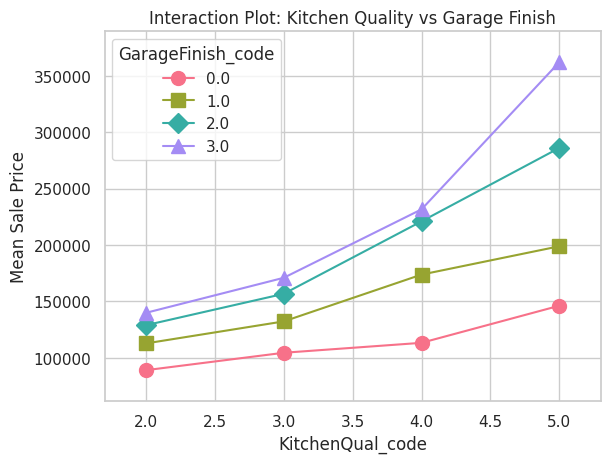

In [9]:
from statsmodels.graphics.factorplots import interaction_plot

# Get the number of unique levels in GarageFinish_code
n_levels = df['GarageFinish_code'].nunique()
# Generate enough markers and colors
import itertools
default_markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*', 'h', '+', 'x']
default_colors = sns.color_palette("husl", n_levels)
markers = list(itertools.islice(itertools.cycle(default_markers), n_levels))

# Example interaction plot: Kitchen vs. Garage
interaction_plot(
    df['KitchenQual_code'],
    df['GarageFinish_code'],
    df['SalePrice'],
    colors=default_colors,
    markers=markers,
    ms=10
)
plt.title("Interaction Plot: Kitchen Quality vs Garage Finish")
plt.ylabel("Mean Sale Price")
plt.xticks(rotation=0)
plt.grid(True)
plt.show()


### Interaction Plot: Kitchen Quality × Garage Finish

The interaction plot between `KitchenQual_code` and `GarageFinish_code` reveals:

- A clear **positive slope** for all garage finish levels: higher kitchen quality consistently leads to higher sale prices.
- The slope is **steepest** for `GarageFinish_code = 3`, suggesting that homes with high-end garages and kitchens benefit most.
- While the statistical interaction (p ≈ 0.68) was not significant in ANOVA, the **visual pattern** hints at practical relevance.

This supports the idea that combining high-quality interior and exterior finish boosts value more than either alone.


In [10]:
# Grouped mean sale prices to visualize main effects
group_means = df.groupby('KitchenQual_code')['SalePrice'].mean()
print("Mean Sale Price by Kitchen Quality:")
print(group_means)


Mean Sale Price by Kitchen Quality:
KitchenQual_code
2    105565.205128
3    139962.511565
4    212116.023891
5    328554.670000
Name: SalePrice, dtype: float64


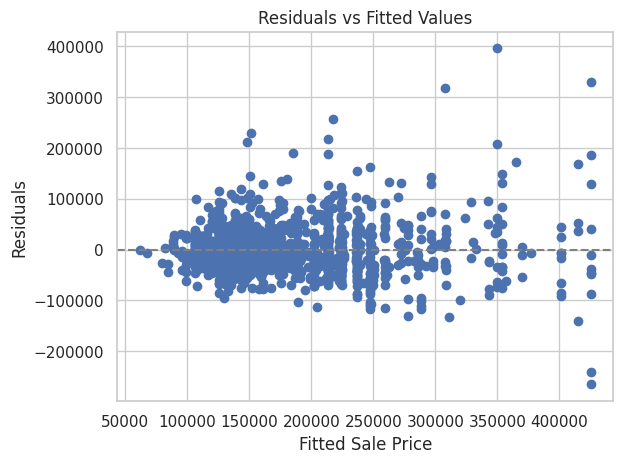

In [11]:
# Residuals plot
plt.scatter(model.fittedvalues, model.resid)
plt.axhline(0, linestyle='--', color='gray')
plt.xlabel("Fitted Sale Price")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.grid(True)
plt.show()


### Residual Diagnostics

The residuals vs. fitted plot shows:

- Residuals are generally centered around 0, good.
- A slight **funnel shape** indicates **heteroscedasticity**, where variance increases with predicted value.
- No strong curvature or patterns, which supports the **linearity** assumption.

To address the heteroscedasticity, a **log transformation of `SalePrice`** could help stabilize the variance.
